# How do Indians Vote?

![](https://api.time.com/wp-content/uploads/2014/04/486450555.jpg)

# Introduction to the analysis

India is a country, divided into states and union territories, with a parliamentary system governed under the Constitution of India, which defines the power distribution among the federal government and the states.
Election Commission is a federal body, enacted under the provisions of the Constitution, responsible for monitoring and administering all the electoral processes of India. This body is responsible for ensuring elections are free and fair, without any bias

**The Analysis here is based on the election to Lok Sabha (The General Elections) for the year 2019**
Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers. The house meets in the Lok Sabha Chambers of the Sansad Bhavan in New Delhi, on matters relating to creation of new laws, removing or improving the existing laws that affect all citizens of India. 

https://www.kaggle.com/datasets/prakrutchauhan/indian-candidates-for-general-election-2019

In [45]:
# https://www.kaggle.com/datasets/somacodes/india-states

# Presenting an view before going into the Analysis

![](https://upload.wikimedia.org/wikipedia/commons/c/c2/Indian_General_Election_2019.svg)

# Importing the dataset

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx


# # Lets Check out the data

In [ ]:
vote=pd.read_csv('input/indian-candidates-for-general-election-2019/LS_2.0.csv')
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


# To help our Analysis, lets go for some...

![](https://miro.medium.com/max/500/1*yWFQiGjlgHUVYeh4ELELyw.jpeg)

**Identifying the Null values in the columns**

In [3]:
vote.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

**Identifying the null entries in the data**

In [4]:
vote[vote.SYMBOL.isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

**Cleaning up the Assets and Liabilities columns**

In [5]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


**Renaming the columns**

In [6]:
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


**Cleaning up the Educational Qualification of the election contestants**

In [7]:
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [8]:
vote.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

**Identifying the Data Type of the columns**

In [9]:
vote.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

**Identifying Discrepancy entries in the columns**

In [10]:
vote[vote['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


**Updating the data types for the analysis**

In [11]:
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

# The Analysis

# State and Constituency Level Analysis

# What is the distribution of Constituencies over all the states?

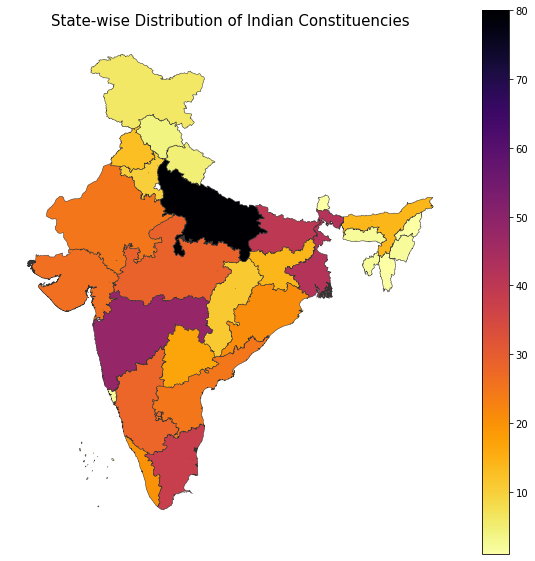

In [12]:
st_con=vote.groupby('STATE').apply(lambda x:x['CONSTITUENCY'].nunique()).reset_index(name='# Constituency')
shp_gdf = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
merged = shp_gdf.set_index('st_nm').join(st_con.set_index('STATE'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='# Constituency', cmap='inferno_r',linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
st_con.sort_values(by='# Constituency',ascending=False,inplace=True)
fig2 = px.bar(st_con, x='STATE', y='# Constituency',
                     color='# Constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',template='plotly_dark')
fig2.show()

**Observation** Uttar Pradesh, Maharashtra and West Bengal- The sates have the most number of constituencies. There exists a direct relationship of count of constituencies and population- The constituencies are divided based on the population of 1971- and this shall remain till the year 2026. Although currently Bihar has a higher population, West Bengal has the 3rd highest constituency count based on the above fact.

# Lets create a Sunburst image of all the States and Constituencies

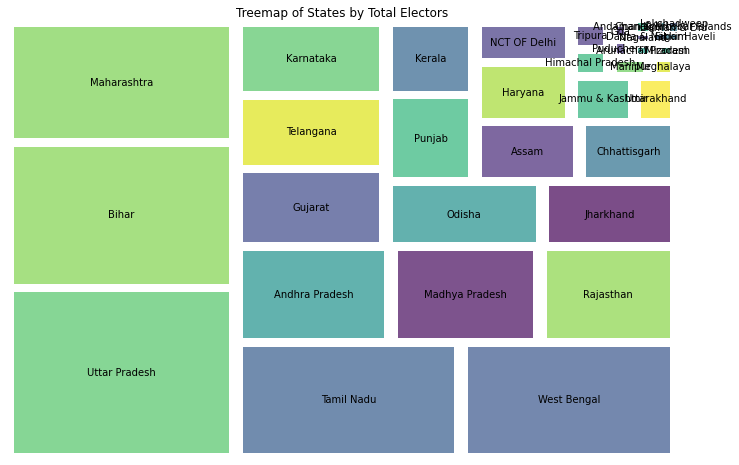

In [13]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Sample Data (Replace with actual vote data)
st_con_vt = vote[['STATE', 'CONSTITUENCY', 'TOTAL ELECTORS']]

# Group by state and sum total electors
state_totals = st_con_vt.groupby('STATE')['TOTAL ELECTORS'].sum().reset_index()

# Sort values
state_totals = state_totals.sort_values(by='TOTAL ELECTORS', ascending=False)

# Normalize values for squarify
sizes = state_totals['TOTAL ELECTORS']

# Create treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=state_totals['STATE'], alpha=0.7, pad=True)

# Add title
plt.title("Treemap of States by Total Electors")

# Remove axes
plt.axis('off')

# Show plot
plt.show()


# Party Level Analysis

# Which Parties have been present in most constituencies and States?

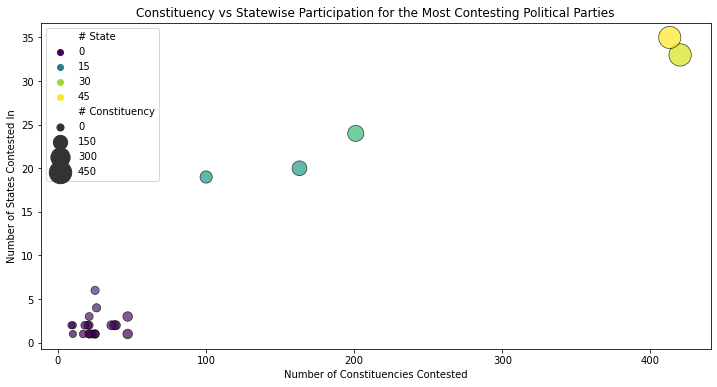

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out 'NOTA' party
vote_prty = vote[vote['PARTY'] != 'NOTA']

# Count the number of constituencies contested by each party
prty_cnt = vote_prty.groupby('PARTY')['CONSTITUENCY'].count().reset_index(name='# Constituency')

# Count the number of states each party is contesting in
prty_st = vote_prty.groupby('PARTY')['STATE'].nunique().reset_index(name='# State')

# Sort values by the number of constituencies in descending order
prty_cnt.sort_values(by='# Constituency', ascending=False, inplace=True)

# Select the top 25 parties
prty_top_cn = prty_cnt[:25]

# Merge constituency and state counts
prty_top_all = pd.merge(prty_top_cn, prty_st, on='PARTY', how='inner')

# Set figure size
plt.figure(figsize=(12, 6))

# Create scatter plot
sns.scatterplot(data=prty_top_all, x='# Constituency', y='# State', size='# Constituency', 
                hue='# State', palette='viridis', sizes=(50, 500), edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Number of Constituencies Contested')
plt.ylabel('Number of States Contested In')
plt.title('Constituency vs Statewise Participation for the Most Contesting Political Parties')

# Show the plot
plt.show()


**Observation** The Bharatiya Janata Party (BJP) and Indian National Congress (INC) have participated in the most number of constituencies all over India. While BJP leads in the number of constituency contested, INC wins in terms of the number of States. While these are the major parties to contest almost all over India, we see the rest of the parties have restricted themselves to a handfull of states.

# What has been the performance of the Parties Statewise?

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

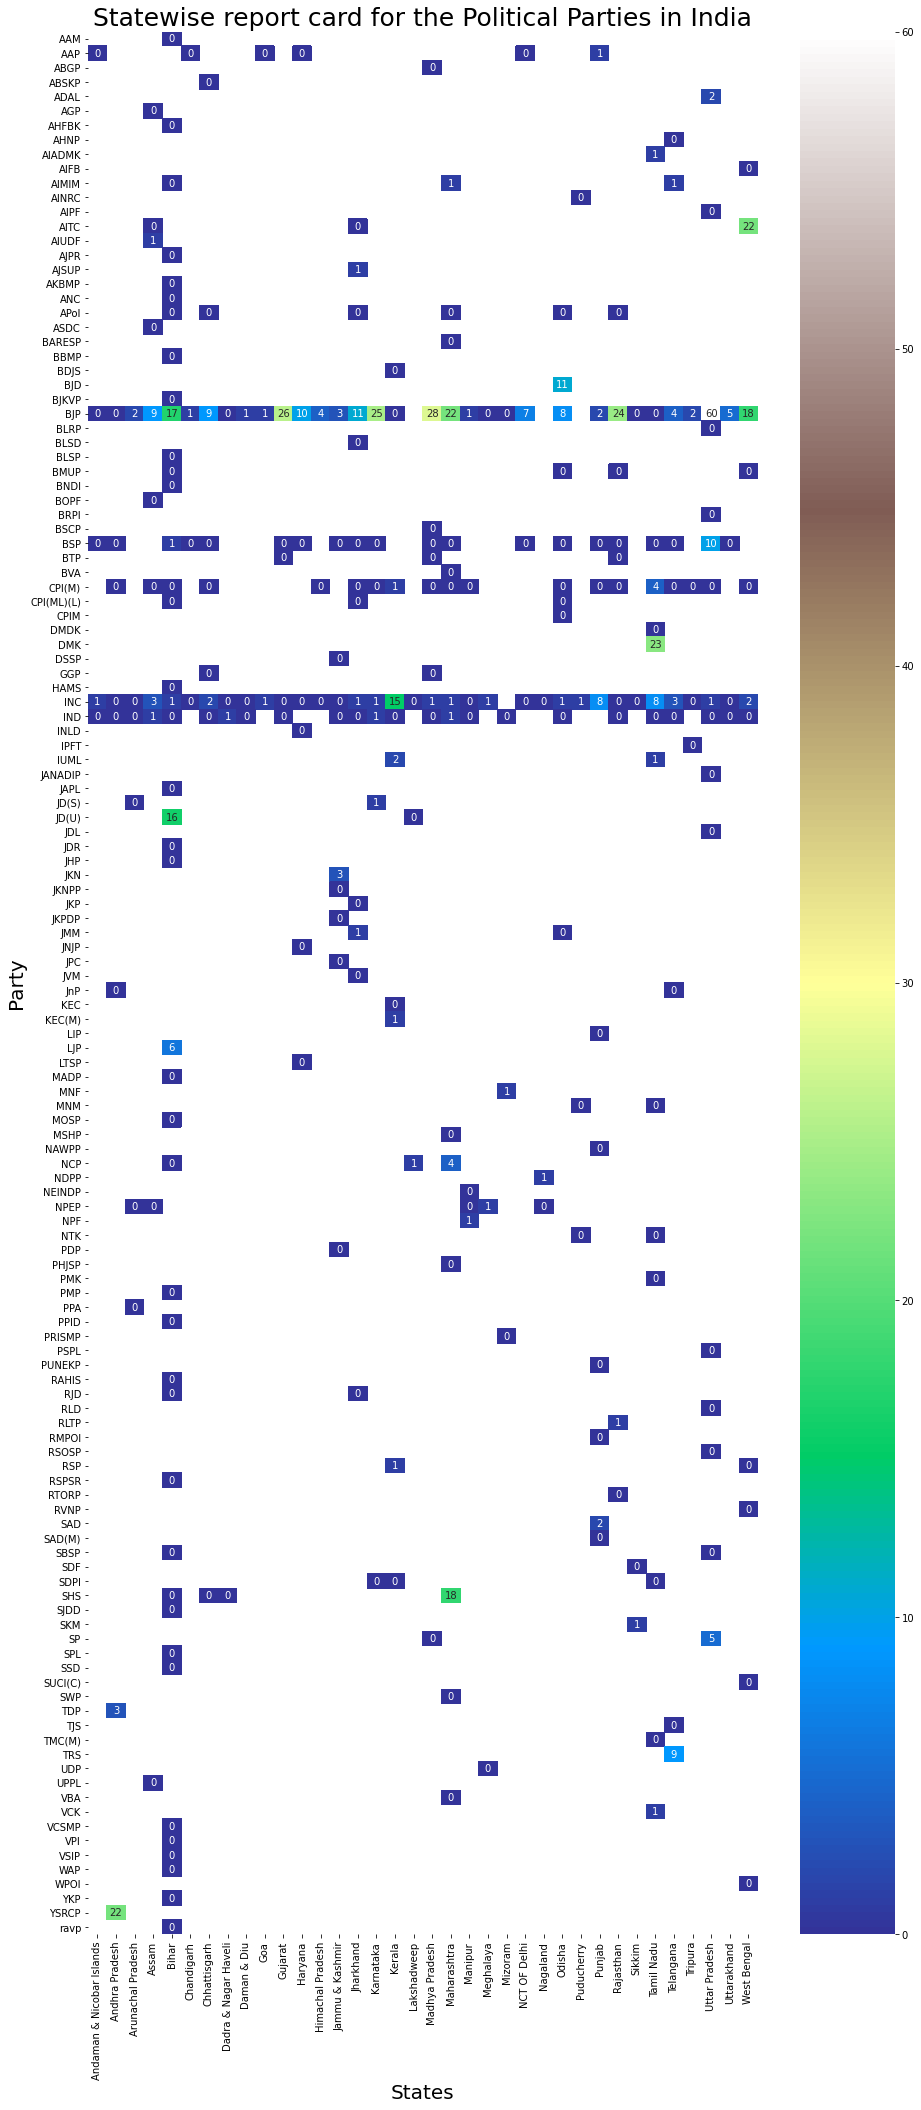

In [15]:
st_prty=vote_prty.groupby(['PARTY','STATE']).apply(lambda x:x['WINNER'].sum()).reset_index(name='Wins')
pvt_st_prty=pd.pivot(st_prty,index='PARTY',columns='STATE',values='Wins')
plt.figure(figsize=(15,35))
sns.heatmap(pvt_st_prty,annot=True,fmt='g',cmap='terrain')
plt.xlabel('States',size=20)
plt.ylabel('Party',size=20)
plt.title('Statewise report card for the Political Parties in India',size=25)

# Which party has won the most constituencies?

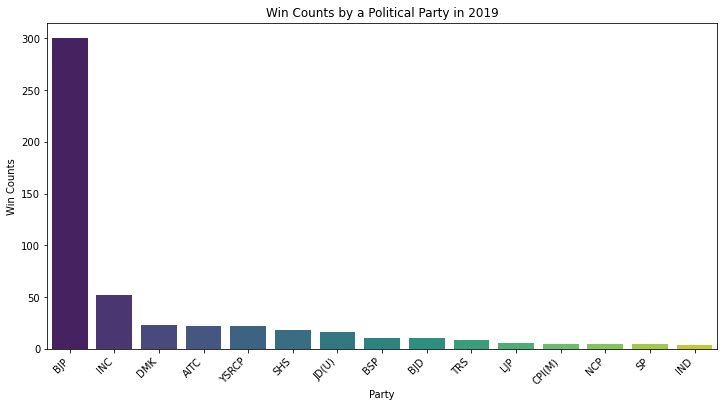

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by 'PARTY' and count the number of wins
part_win = vote.groupby('PARTY')['WINNER'].sum().reset_index(name='# Wins')

# Sort values in descending order
part_win.sort_values(by='# Wins', ascending=False, inplace=True)

# Select the top 15 parties
top_part_win = part_win[:15]

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=top_part_win, x='PARTY', y='# Wins', palette='viridis')

# Add labels and title
plt.xlabel('Party')
plt.ylabel('Win Counts')
plt.title('Win Counts by a Political Party in 2019')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


**Observation** As seen from the data, In 2019, BJP has won the maximum constituencies all over India. The Image below the introduction also suggests the same. The distribution of all the parties is presented below. INC, who stood 2nd in the number of victories had only 52, which is practically 1/6th of the constituencies won by BJP

# What has been the general Win vs Loss relationship for the Parties in 2019?

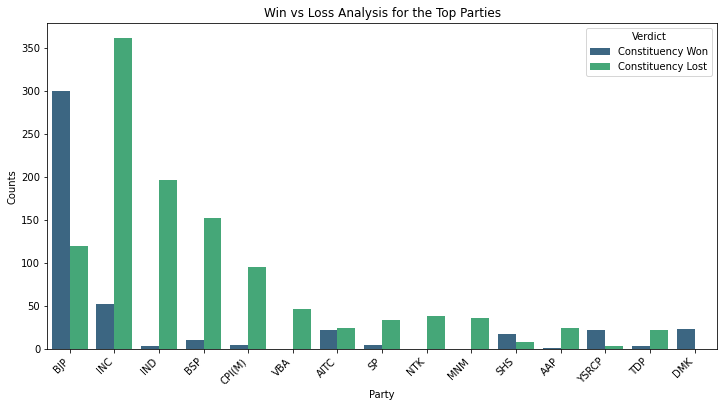

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge party data on common column 'PARTY'
prty_cnt_win = pd.merge(prty_cnt, part_win, how='inner', on='PARTY')

# Calculate losses
prty_cnt_win['Lost'] = prty_cnt_win['# Constituency'] - prty_cnt_win['# Wins']

# Prepare data for wins and losses
prty_wins_cnt = prty_cnt_win[['PARTY', '# Wins']].copy()
prty_wins_cnt['Verdict'] = 'Constituency Won'
prty_loss_cnt = prty_cnt_win[['PARTY', 'Lost']].copy()
prty_loss_cnt['Verdict'] = 'Constituency Lost'

# Rename columns for consistency
prty_wins_cnt.columns = ['Party', 'Counts', 'Verdict']
prty_loss_cnt.columns = ['Party', 'Counts', 'Verdict']

# Select top 15 parties
top_prty_wins_cnt = prty_wins_cnt[:15]
top_prty_loss_cnt = prty_loss_cnt[:15]

# Concatenate win and loss data
prt_win_loss = pd.concat([top_prty_wins_cnt, top_prty_loss_cnt])

# Set figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar chart
sns.barplot(data=prt_win_loss, x='Party', y='Counts', hue='Verdict', palette='viridis')

# Add labels and title
plt.xlabel('Party')
plt.ylabel('Counts')
plt.title('Win vs Loss Analysis for the Top Parties')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Verdict')

# Show the plot
plt.show()


**Observation** As seen in the above chart, the 2019 elections have been extremely lucky for parties like BJP,SHS or DMK. But it has been a major failure for the rest of the parties, where they have lost more than they won.

# Politician Level Analytics

# What is the Gender Ratio of the Contestants? Also the Gender Ratio of the Winners?

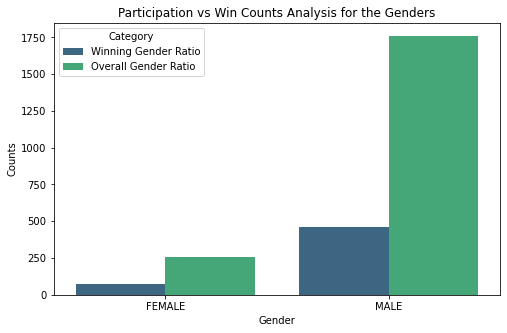

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude NOTA votes
vote_gndr = vote[vote['PARTY'] != 'NOTA']

# Count overall participation by gender
gndr_overall = vote_gndr.groupby('GENDER')['NAME'].count().reset_index(name='Counts')
gndr_overall['Category'] = 'Overall Gender Ratio'

# Filter winners
winners = vote_gndr[vote_gndr['WINNER'] == 1]

# Count winners by gender
gndr_winner = winners.groupby('GENDER')['NAME'].count().reset_index(name='Counts')
gndr_winner['Category'] = 'Winning Gender Ratio'

# Combine both dataframes
gndr_overl_win = pd.concat([gndr_winner, gndr_overall])

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
sns.barplot(data=gndr_overl_win, x='GENDER', y='Counts', hue='Category', palette='viridis')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Participation vs Win Counts Analysis for the Genders')

# Show legend
plt.legend(title='Category')

# Show the plot
plt.show()


**Observation** Out of the total list of participants only 12.78% (258 out of 2018) are female politicians, while 87.21% (1760 out of 2018) are male. Upon considering the winners, 14.1% (76 out of 463) are female politicians, while 85.9% are male politicians. The Gender ratio is not very well distributed as can be seen from the above presentation.

# What is the Educational Qualification of our politicians?

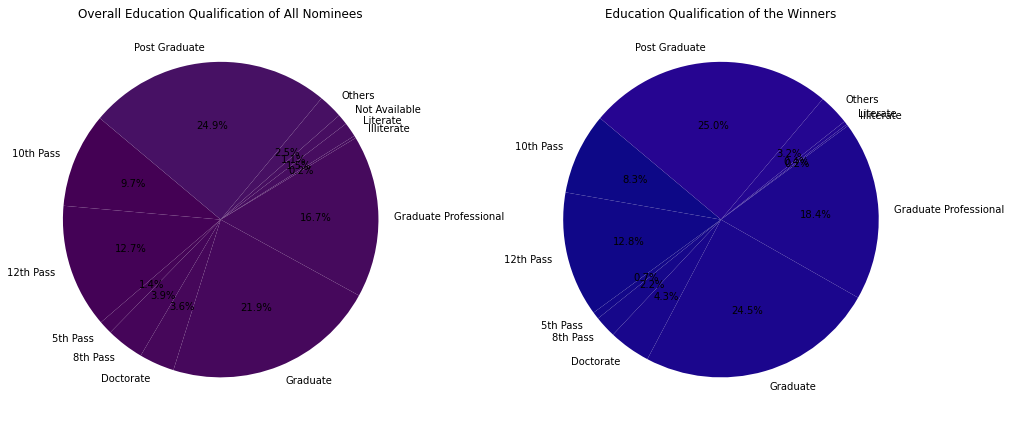

In [19]:
import matplotlib.pyplot as plt

# Exclude NOTA votes
ed_valid = vote[vote['PARTY'] != "NOTA"]

# Count nominees by education
ed_cnt = ed_valid.groupby('EDUCATION')['PARTY'].count().reset_index(name='Counts')

# Count winners by education
ed_won = ed_valid[ed_valid['WINNER'] == 1]
ed_win_cnt = ed_won.groupby('EDUCATION')['PARTY'].count().reset_index(name='Counts')

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define "explode" to highlight slices
explode = [0.1 if i % 3 == 0 else 0.2 if i % 4 == 0 else 0 for i in range(len(ed_cnt))]

# Pie chart for overall education qualification
axes[0].pie(ed_cnt['Counts'], labels=ed_cnt['EDUCATION'], autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis.colors)
axes[0].set_title('Overall Education Qualification of All Nominees')

# Pie chart for winners' education qualification
axes[1].pie(ed_win_cnt['Counts'], labels=ed_win_cnt['EDUCATION'], autopct='%1.1f%%', startangle=140, colors=plt.cm.plasma.colors)
axes[1].set_title('Education Qualification of the Winners')

# Adjust layout
plt.tight_layout()
plt.show()


**Observation** The total percentage of Graduate+ educated people contesting in the election is 67.12%, which has increased to 72.17% of the winners. This is actually a positive sign, as educated politicians are a very big factor towards a country's development. But still around 28% of the politicians have received no professional degree. Hope with passing time, we improve upon this factor, and consider the educational qualification as a primary requirement while voting!

# What is the relationship of Age and Politics?

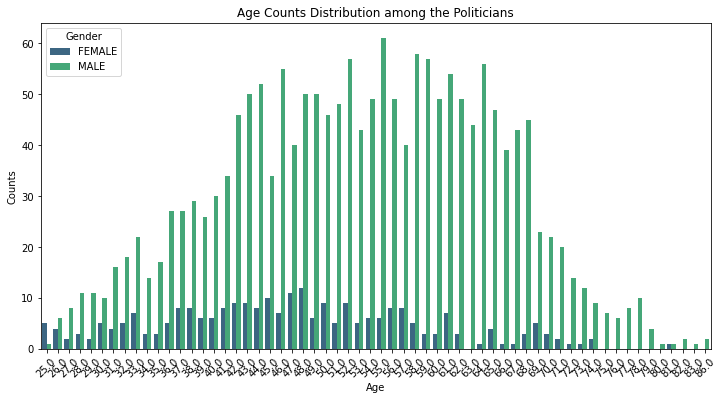

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by AGE and GENDER, then count occurrences
age_cnt = ed_valid.groupby(['AGE', 'GENDER'])['NAME'].count().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(12, 6))

# Create histogram (bar plot) with gender-based coloring
sns.barplot(data=age_cnt, x='AGE', y='Counts', hue='GENDER', palette='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Counts Distribution among the Politicians')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Gender')

# Show the plot
plt.show()


**Observation** Most Number of female politicians have their average age between 45-50, while for male politician, it ranges from 50-60 range. The average age of male politians is more as compared to female politicians contesting for the Lok Sabha elections.

# What relation does the Politician category have with the election results?

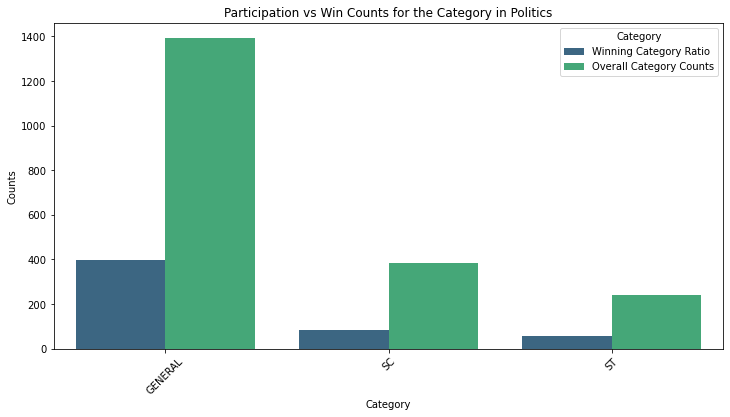

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exclude NOTA votes
vote_cat = vote[vote['PARTY'] != 'NOTA']

# Count total participation by category
cat_overall = vote_cat.groupby('CATEGORY')['NAME'].count().reset_index(name='Counts')
cat_overall['Category'] = 'Overall Category Counts'

# Filter winners
winners_cat = vote_gndr[vote_gndr['WINNER'] == 1]

# Count winners by category
cat_winner = winners_cat.groupby('CATEGORY')['NAME'].count().reset_index(name='Counts')
cat_winner['Category'] = 'Winning Category Ratio'

# Combine both dataframes
cat_overl_win = pd.concat([cat_winner, cat_overall])

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=cat_overl_win, x='CATEGORY', y='Counts', hue='Category', palette='viridis')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Participation vs Win Counts for the Category in Politics')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show legend
plt.legend(title='Category')

# Show the plot
plt.show()


**Observation** The Category participation of General-SC-ST have been in the ratio of 68.97:18.97:12.04- while as of the winners, the ratios have been modified to 74.02:15.76:10:20

# Have the politicians been involved with criminal activities?

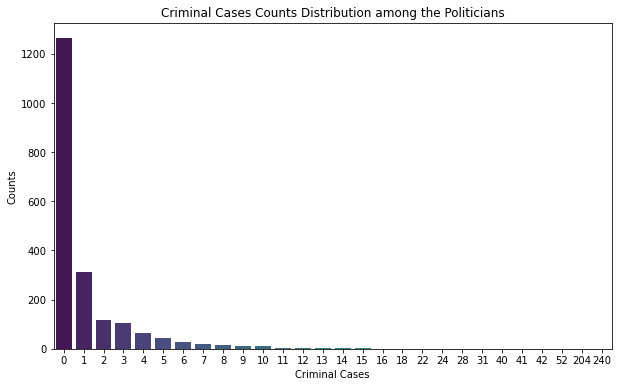

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'CRIMINAL CASES' and count occurrences
crim_cnt = ed_valid.groupby('CRIMINAL CASES')['NAME'].count().reset_index(name='Counts')

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram (bar plot)
sns.barplot(data=crim_cnt, x='CRIMINAL CASES', y='Counts', palette='viridis')

# Add labels and title
plt.xlabel('Criminal Cases')
plt.ylabel('Counts')
plt.title('Criminal Cases Counts Distribution among the Politicians')

# Show the plot
plt.show()


**Observations** Many politicians have been associated with criminal activities. Always these cases pressed need not be genuine, but obviously, when its multiple- this is a serious issue. We must take the responsibility while voting, as its our duty to choose the right person- as a duty towards the nation.

# Plotting the Assets vs Liabilities amount for Winning Politicians (Plotted w.r.t State)

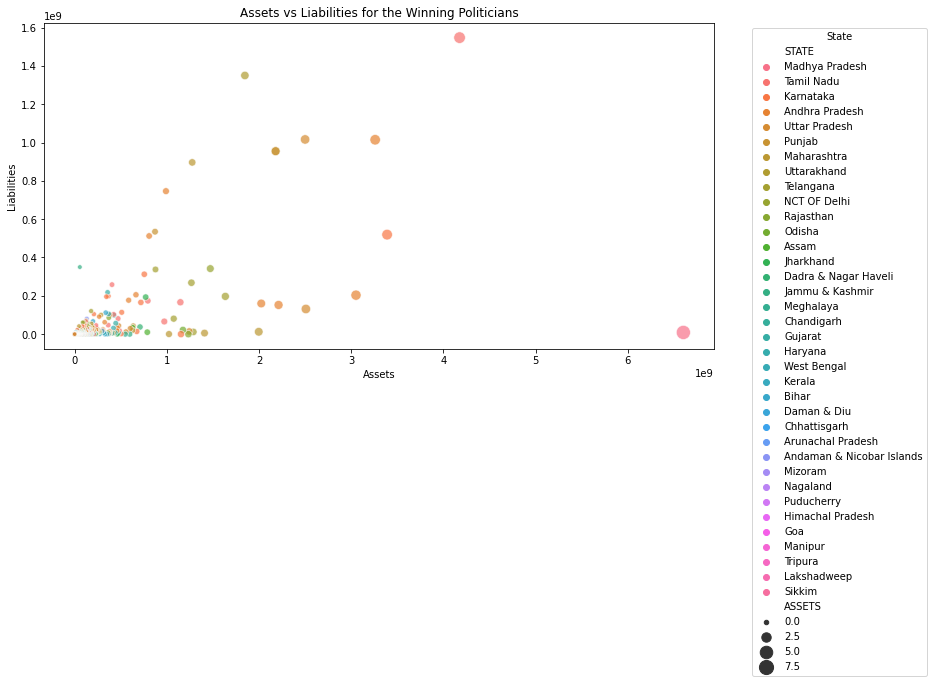

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
as_liab_name = ed_valid[['NAME', 'PARTY', 'ASSETS', 'LIABILITIES', 'STATE', 'CONSTITUENCY', 'WINNER']]

# Replace 1/0 in WINNER column with 'Yes'/'No'
as_liab_name['WINNER'] = as_liab_name['WINNER'].replace({1: 'Yes', 0: 'No'})

# Filter only winners
win_as_liab_name = as_liab_name[as_liab_name['WINNER'] == 'Yes']

# Sort by ASSETS in descending order
win_as_liab_name = win_as_liab_name.sort_values(by='ASSETS', ascending=False)

# Set figure size
plt.figure(figsize=(12, 6))

# Create scatter plot
scatter = sns.scatterplot(data=win_as_liab_name, x='ASSETS', y='LIABILITIES', hue='STATE', size='ASSETS', sizes=(20, 200), alpha=0.7, edgecolors='w')

# Add labels and title
plt.xlabel('Assets')
plt.ylabel('Liabilities')
plt.title('Assets vs Liabilities for the Winning Politicians')

# Customize legend
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


**Observations** The assets and liabilities of the Winning politicians have been plotted. The parameters vary largely depending on the business/services they are associated with besides politics.
No valid correlation could be inferred with respect to assets and liabilities.

# Prediction

**Note** We shall use Random Classifier to predict the results of the election.

In [24]:
vote_df=vote[vote['PARTY']!='NOTA']
vote_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
vote_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i=1
parties_dict={}
for j in vote_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
vote_df['PARTY'].replace(parties_dict,inplace=True)
a=1
edu_dict={}
for b in vote_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
vote_df['EDUCATION'].replace(edu_dict,inplace=True)
df1 = vote_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','AGE','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']
# dataset = pd.get_dummies(df1)
dataset=df1
# from sklearn.preprocessing import StandardScaler
# standardScaler = StandardScaler()
# scaling_columns = num_cols
# dataset[scaling_columns] = standardScaler.fit_transform(dataset[scaling_columns])
dataset.head()

,STATE,CONSTITUENCY,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,LIABILITIES
0,Telangana,ADILABAD,1,1,Lotus,1,52,52.0,3,1,377374,1489790,3099414,231450
1,Telangana,ADILABAD,0,2,Car,1,0,54.0,3,2,318814,1489790,18477888,847000
2,Telangana,ADILABAD,0,3,Hand,1,3,52.0,3,1,314238,1489790,36491000,15300000
4,Uttar Pradesh,AGRA,1,1,Lotus,1,5,58.0,2,3,646875,1937690,74274036,8606522
5,Uttar Pradesh,AGRA,0,4,Elephant,1,0,47.0,2,2,435329,1937690,133784385,22251891


In [25]:
dataset.SYMBOL.value_counts()

Lotus                      420
Hand                       413
Elephant                   166
Bicycle                     65
Hammer, Sickle and Star     63
                          ... 
Tent                         1
COCONUT FARM                 1
Matchbox                     1
Plastering Trowel            1
Cock                         1
Name: SYMBOL, Length: 126, dtype: int64

In [26]:
dataset.drop(['STATE','CONSTITUENCY','SYMBOL'],axis=1,inplace=True)

In [27]:
# dataset.to_csv("election.csv",index=False)

In [28]:
dataset.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'TOTAL VOTES', 'TOTAL ELECTORS', 'ASSETS', 'LIABILITIES'],
      dtype='object')

In [29]:
dataset

,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,LIABILITIES
0,1,1,1,52,52.0,3,1,377374,1489790,3099414,231450
1,0,2,1,0,54.0,3,2,318814,1489790,18477888,847000
2,0,3,1,3,52.0,3,1,314238,1489790,36491000,15300000
4,1,1,1,5,58.0,2,3,646875,1937690,74274036,8606522
5,0,4,1,0,47.0,2,2,435329,1937690,133784385,22251891
...,...,...,...,...,...,...,...,...,...,...,...
2257,0,132,2,0,28.0,1,6,20620,1916185,1168500,9000
2258,0,18,1,0,43.0,1,2,14686,1916185,4890000,1020000
2259,1,2,1,18,63.0,1,4,434244,1498666,1287851556,11535000
2260,0,3,1,0,49.0,1,2,428015,1498666,903663001,0


In [30]:
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_upsampled = resample(df_winner, replace = True,n_samples = 1452, random_state = 0) 
df_total_upsampled = pd.concat([df_not_winner, df_winner_upsampled])
df_total_upsampled.WINNER.value_counts()
y = df_total_upsampled['WINNER']
X = df_total_upsampled.drop(['WINNER'], axis = 1)
rf_scores = []
for k in range(1,60):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rf_scores.append(score.mean())
fig=px.scatter(x=[k for k in range(1, 60)],y= rf_scores,color=rf_scores,size=rf_scores)
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

**Observation** As seen from the above scatter plot, for tge value of k=38, we get the highest accuracy values. We shall be using the same for our model's prediction

In [31]:
randomforest_classifier= RandomForestClassifier(n_estimators=38,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 95.7009


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45,test_size=0.2)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ( 
                              classification_report,
                             )

In [35]:
LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)



print(classification_report(y_test,test_prediction))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.919931856899489
train accuracy: 0.9048634812286689
********************
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.89      0.97      0.93       314

    accuracy                           0.92       587
   macro avg       0.93      0.92      0.92       587
weighted avg       0.92      0.92      0.92       587

********************
91.99% Accurate


In [36]:


DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)


********************
********************
Train accuracy: 1.0
Test accuracy: 0.9540034071550255
********************
********************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       273
           1       0.94      0.98      0.96       314

    accuracy                           0.95       587
   macro avg       0.96      0.95      0.95       587
weighted avg       0.95      0.95      0.95       587

********************
95.4% Accurate
********************


In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

#  prediction Summary by species
print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9540034071550255
train accuracy: 1.0
********************
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       273
           1       0.94      0.98      0.96       314

    accuracy                           0.95       587
   macro avg       0.96      0.95      0.95       587
weighted avg       0.96      0.95      0.95       587

********************
95.4% Accurate


In [38]:
score = [DT_SC,RF_SC,lr_HSC]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.954003
1,Random Forest,0.954003
2,logistic Regression,0.919932


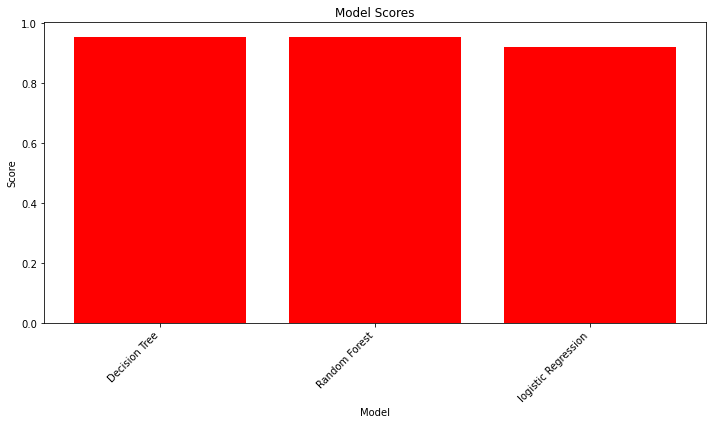

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming score and Models are already defined as per your code

# Create a DataFrame
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "logistic Regression"],'Score': score
})

# Sort the DataFrame by 'Score' in descending order
Models_sorted = Models.sort_values(by='Score', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(Models_sorted['Model'], Models_sorted['Score'], color='red')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
feature_importances = rfc.feature_importances_

# Create DataFrame with feature importance
imp_feature = pd.DataFrame(index=X_train.columns, data=feature_importances, columns=['feature importance'])

# Display feature importance
imp_feature

,feature importance
PARTY,0.154718
GENDER,0.003338
CRIMINAL CASES,0.027143
AGE,0.045110
CATEGORY,0.010544
EDUCATION,0.021830
TOTAL VOTES,0.532346
TOTAL ELECTORS,0.080739
ASSETS,0.078970
LIABILITIES,0.045263


**********Observation** We have reached an accuracy percentage of 96.21% with our model. Will work on to improve the model further- to increase the accuracy.

In [41]:
import pickle
#save the model
model =rfc# Your machine learning model object
file_path = 'voting.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [42]:
# load the model
import pickle

file_path = 'voting.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [43]:
X_train

,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,LIABILITIES
73,3,1,0,46.0,1,1,445032,1507875,34011739,9031565
630,1,1,1,56.0,1,4,684837,1727311,111384447,51736254
915,4,1,0,78.0,2,2,12873,1819893,520000,0
1643,18,1,1,39.0,1,6,10801,1633824,948960,71325
2243,1,1,0,65.0,1,6,578364,1743283,65807822,8961387
...,...,...,...,...,...,...,...,...,...,...
253,18,1,0,46.0,1,1,17025,1699394,7341490,0
939,21,1,0,82.0,2,8,366221,1617018,38633246,2297303
574,18,1,0,56.0,3,4,90421,250029,708885980,37268162
1112,3,2,0,43.0,1,2,695697,1387286,6046055,379000


In [44]:
loaded_model.predict([['3','1','0','46','1','1','445032','1507875','34011739','9031565']])

array([1])

# Summary

After analyzing the voting pattern of Indians, we have come upon multiple conclusions. Let us look at them in the below points:

1. In 2019, the Bharatiya Janata Party (BJP) has claimed the most number of seats all over India- dominating clearly over all the national and the satte specific parties. The outreach created by them has really made them claim their position in the Lok Sabha.
2. Gerneally, education is regarded as a significant factor while voting. Arounf 72%+ of the winners are having a gradutae + degree. This is a significant factor for a developing nation like India- where we need educated politicians to lead the nation.
3. The general paticipation of Female politicians is much less than the male politicians. A balanced gander ratio would be good enough- as people from all sectors would be able to contribute to the progress of the society.
4. The average age of polticians is high. It might be an advantage if younger politicians contest and are able to lead the nation. Altough is is never a parameter to think that the older politicians wouldn't be able to perform their tasks well- but it comes with the risk of health and age related issues.
5. Criminal activities is a serious concern- as the people who are elected by us- indirectly are the face of the nation. They should be more of a role model-rather than someone who is not respected.
6. As our prediction suggestes, we have reached an accuracy of 96.2% in estimating the winning participants using Random classifier model. I shall work upon to improve this model further in the future updates

# About the data

1. The data is very good- cleaned and well presented. Need to just have some further checks upon the validity. I have found some discrepancies in the data which I will be sharing.
2. Some data types and columns needed basic cleaning which we have done as seen above.
3. Overall it gives us a good sense about Indian poltical scenerio and what factors should we consider while we choose our representative. Its our reponsibility to choose the right candidates, such that they can make the difference!

# Please upvote if you liked the Analysis!!!